In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("My Uber Drives - 2016.csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
data.shape

(1156, 7)

In [6]:
#To understand the data more deeply, we need to know about the null values count, datatype.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
#there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword. 

In [8]:
data['PURPOSE*'].fillna("NOT", inplace=True)

In [9]:
#Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis

data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], 
                                       errors='coerce')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], 
                                     errors='coerce')

In [10]:
#Splitting the START_DATE to date and time column and then converting the time into four different categories 
#i.e. Morning, Afternoon, Evening, Night

from datetime import datetime

data['date'] = pd.DatetimeIndex(data['START_DATE*']).date
data['time'] = pd.DatetimeIndex(data['START_DATE*']).hour

#changing into categories of day and night
data['day-night'] = pd.cut(x=data['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [11]:
# now drop rows with null values
data.dropna(inplace=True)

In [12]:
#drop the duplicates rows from the dataset
data.drop_duplicates(inplace=True)

Data Visualization

In [13]:
# checking the unique values in dataset of the columns with object datatype

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = data[col].unique().size
unique_values

{'CATEGORY*': 2, 'START*': 175, 'STOP*': 186, 'PURPOSE*': 11, 'date': 291}

In [14]:
#rename the coloumn names
# Renaming all columns by removing the '*'
data.rename(columns={
    'START_DATE*': 'START_DATE',
    'END_DATE*': 'END_DATE',
    'CATEGORY*': 'CATEGORY',
    'START*': 'START',
    'STOP*': 'STOP',
    'MILES*': 'MILES',
    'PURPOSE*': 'PURPOSE'
}, inplace=True)

# Verify the change
print(data.columns)


Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'date', 'time', 'day-night'],
      dtype='object')


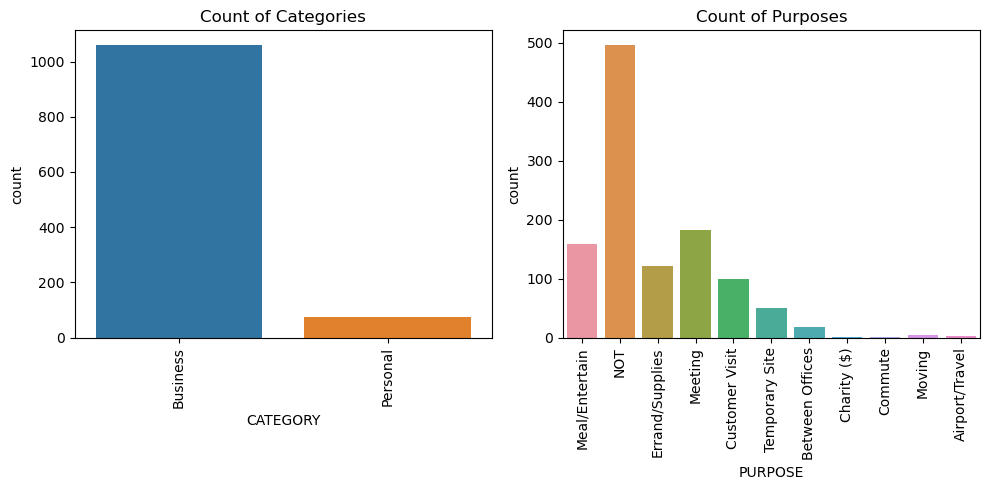

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# First subplot for CATEGORY
plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=data)  # Specify 'x' parameter
plt.xticks(rotation=90)
plt.title('Count of Categories')  # Optional: Add title for clarity

# Second subplot for PURPOSE
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=data)  # Specify 'x' parameter
plt.xticks(rotation=90)
plt.title('Count of Purposes')  # Optional: Add title for clarity

plt.tight_layout()  # Optional: Adjust layout to prevent overlap
plt.show()


/Users/macbookair/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


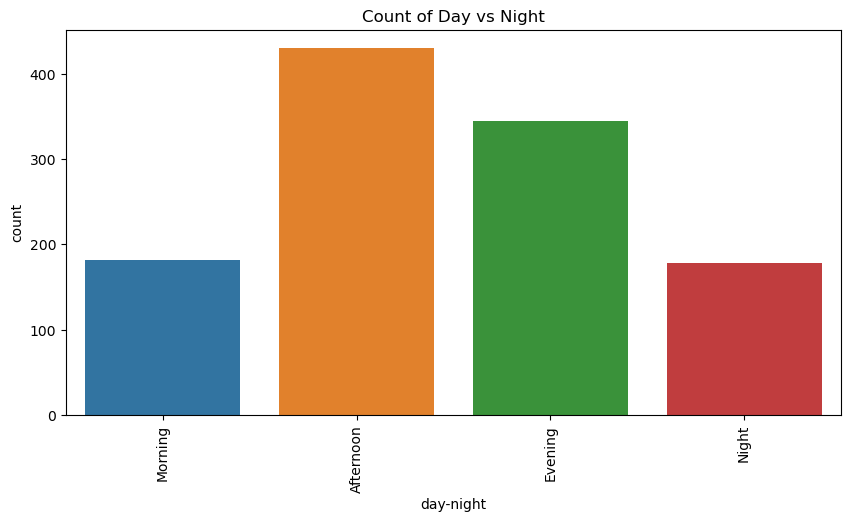

In [16]:
# Create the count plot for the 'day-night' column
plt.figure(figsize=(10, 5))
sns.countplot(x='day-night', data=data)  # Use the x parameter to specify the column
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Count of Day vs Night')  # Optional: Add a title
plt.show()

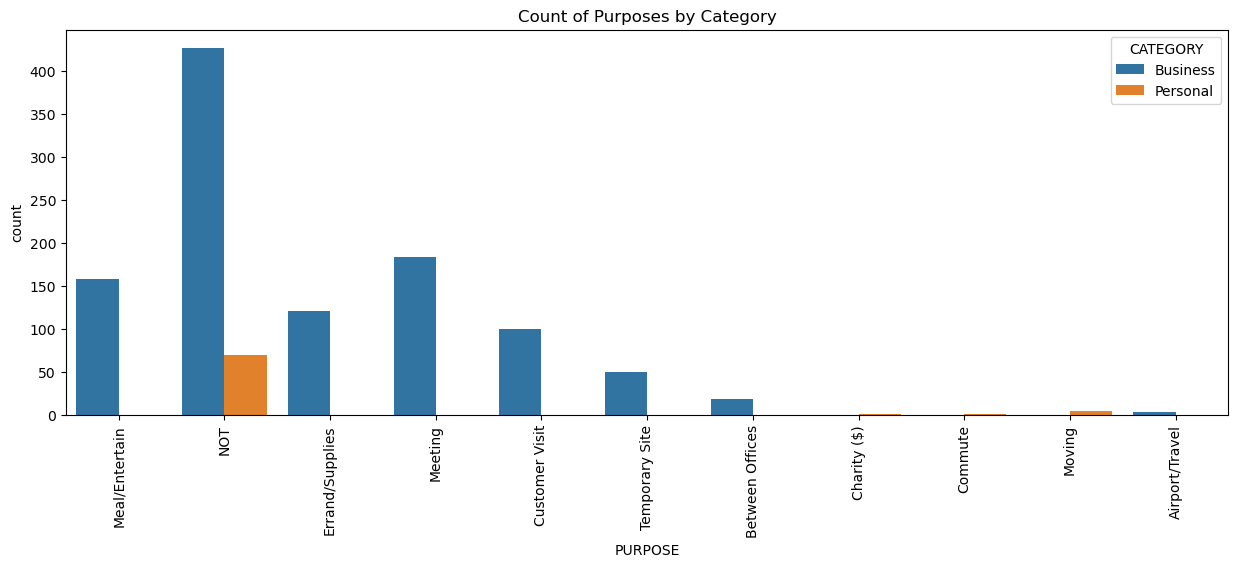

In [17]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Create the count plot for 'PURPOSE' with 'CATEGORY' as hue
sns.countplot(data=data, x='PURPOSE', hue='CATEGORY')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.title('Count of Purposes by Category')  # Optional: Add a title for clarity
plt.show()


Insights from the above count-plots : 
      * Most of the rides are booked for business purpose.
      * Most of the people book cabs for Meetings and Meal / Entertain purpose.
      * Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Specify the categorical columns to encode
object_cols = ['CATEGORY', 'PURPOSE']

# Initialize OneHotEncoder
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))

# Set the index to match the original dataset
OH_cols.index = data.index

# Get the new column names after one-hot encoding
OH_cols.columns = OH_encoder.get_feature_names_out()

# Drop the original categorical columns from the dataset
df_final = data.drop(object_cols, axis=1)

# Concatenate the one-hot encoded columns with the original dataset
data = pd.concat([df_final, OH_cols], axis=1)



/Users/macbookair/Downloads/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


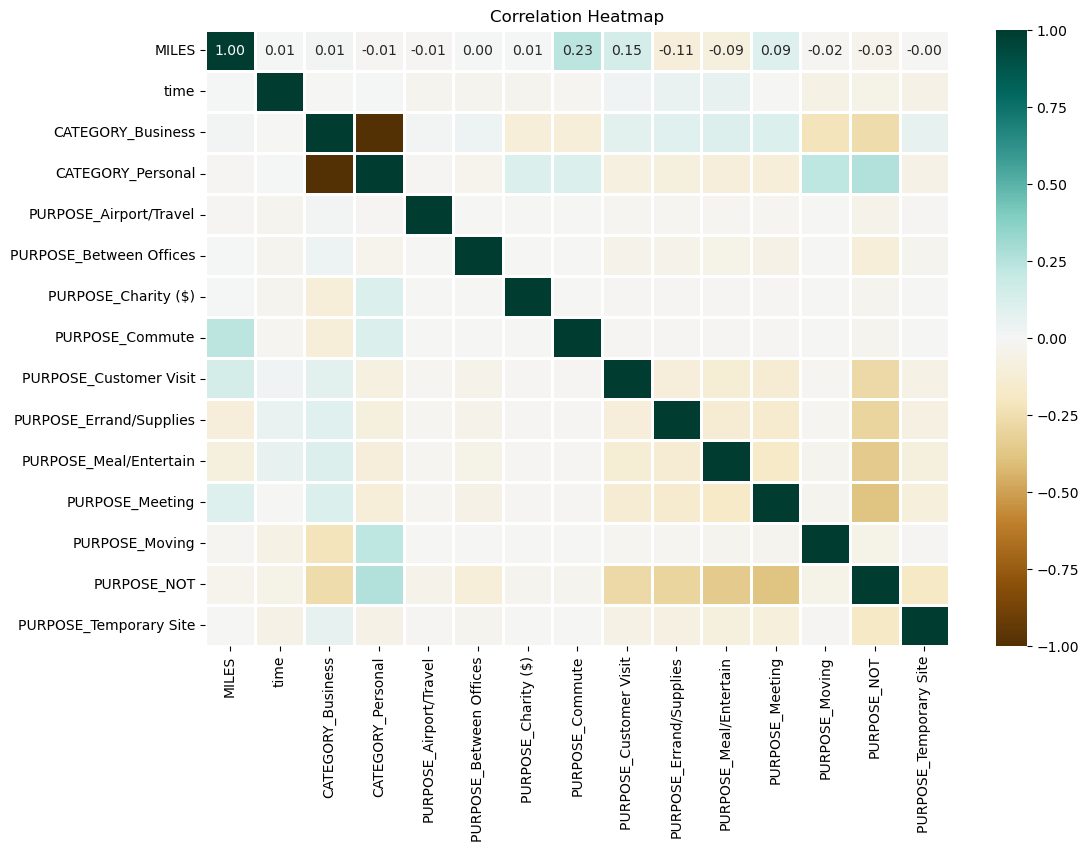

In [19]:
# Select only numerical columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size for better visibility
sns.heatmap(numeric_data.corr(), 
            cmap='BrBG',        # Colormap for the heatmap
            fmt='.2f',         # Format for the annotations
            linewidths=2,      # Width of the lines that will divide each cell
            annot=True)        # Show correlation coefficients in the cells

plt.title('Correlation Heatmap')  
plt.show()


/Users/macbookair/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/macbookair/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

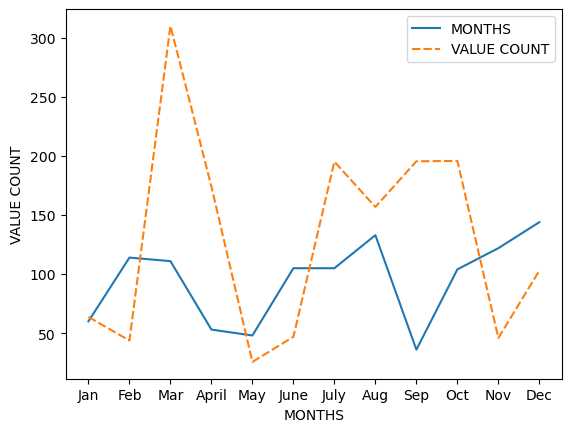

In [20]:
#visualize the month data. This can we same as done before (for hours). 

data['MONTH'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
data["MONTH"] = data.MONTH.map(month_label)

mon = data.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": data.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [21]:
data['DAY'] = data.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
data['DAY'] = data['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

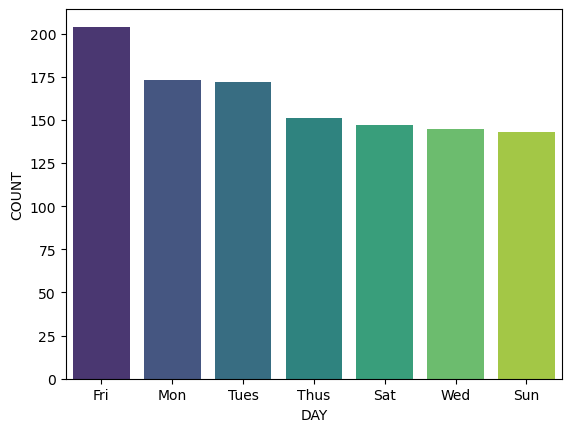

In [22]:
day_label = data.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label,palette='viridis');
plt.xlabel('DAY')
plt.ylabel('COUNT')

/var/folders/z3/fvnw063d183crsl42dx93cjw0000gn/T/ipykernel_4887/1450821616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MILES']<40]['MILES'])
/Users/macbookair/Downloads/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MILES', ylabel='Density'>

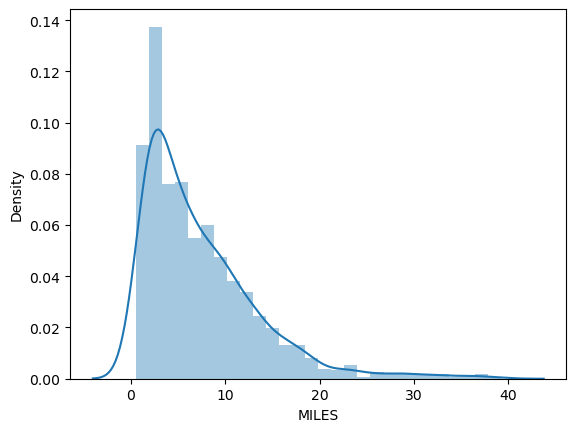

In [23]:
sns.distplot(data[data['MILES']<40]['MILES'])

Insights from the above plots :
                  *Most of the cabs booked for the distance of 4-5 miles.
                  *Majorly people chooses cabs for the distance of 0-20 miles.
                  *For distance more than 20 miles cab counts is nearly negligible.